<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Machine Learning with Decision Tree 

### Decision Tree for Multivariate Modeling for Subsurface Modeling in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)


With Revisions / Improvements by:

#### Evan Morreale, The Unversity of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/evan-morreale-08ba0a187/)

#### Chih-Yu Tung, The Unversity of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/chih-yu-tung-sheldon)

Here's a simple workflow, demonstration of decision trees for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. 

* I have a lecture on [Decision Trees](https://youtu.be/JUGo1Pu3QT4) as part of my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course. Note, all recorded lectures, interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

* Here's some basic details about predictive machine learning decision tree models. 

### Decision Trees

Machine learning method for supervised learning for classification and regression analysis.  Here are some key aspects of support vector machines.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 

**Compact, Interpretable Model**

Since the classification is based on a hierarchy of binary segmentations of the feature space (one feature at a time) the the model can be specified in a intuitive manner as a:

* **tree with binary branches**, hence the name decision tree

* **set of nested if statements**, for example:

```python
if porosity > 0.15:
    if brittleness < 20:
        initial_production = 1000
    else:
        initial_production = 7000
else:
    if brittleness < 40:
        initial_production = 500
    else:
        initial_production = 3000
```

* **predicts with the average of training response features** in each region $\hat{Y}(R_j)$.   

**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a sigle region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

\begin{equation}
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{equation}

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

##### Applications to Subsurface Modeling

To provide a wide variety of spatiotemporal  

* we work with just 2 predictor features for the example below for easy visualization

* flexibility through selection of kernel (hyperparameter) and associated kernel and cost parameters 


##### Why Cover Decision Trees?

They are not the most powerful, cutting edge method in machine learning

* but they are likely the most understandable, interpretable  

* decision trees are expanded with random forests, bagging and boosting to be cutting edge  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You may want to copy the data file to your working directory. They are available here:

* Tabular data - unconv_MV.csv at https://git.io/fjmBH.

or you can use the code below to load the data directly from my GitHub [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository.

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
supress_warnings = True
import os                                                 # to set current working directory 
import math                                               # basic calculations like square root
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                            # for accessing tree information
from sklearn import metrics                               # measures to check our models
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.tree import export_graphviz                  # graphical visualization of trees
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
from sklearn.pipeline import Pipeline                     # machine learning modeling pipeline
from sklearn.pipeline import make_pipeline                # machine learning modeling pipeline
from sklearn.model_selection import GridSearchCV          # model hyperparameter grid search
from sklearn.model_selection import KFold                 # k-fold cross validation
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from sklearn.model_selection import train_test_split      # train and test split
cmap = plt.cm.inferno                                     # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                            # grid behind plotting elements
if supress_warnings == True:
    import warnings                                       # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')    

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap = plt.cm.bwr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def plot_CDF(data,color,alpha=1.0,lw=1,ls='solid',label='none'):
    cumprob = (np.linspace(1,len(data),len(data)))/(len(data)+1)
    plt.scatter(np.sort(data),cumprob,c=color,alpha=alpha,edgecolor='black',lw=lw,ls=ls,label=label,zorder=10)
    plt.plot(np.sort(data),cumprob,c=color,alpha=alpha,lw=lw,ls=ls,zorder=8)
    
def extract_rules(tree_model, feature_names):             # recursive method to extract rules, from paulkernfeld Stack Overflow (?)
    rules = []
    def traverse(node, depth, prev_rule):
        if tree_model.tree_.children_left[node] == -1:    # Leaf node
            class_label = np.argmax(tree_model.tree_.value[node])
            rule = f"{prev_rule} => Class {class_label}"
            rules.append(rule)
        else:  # Split node
            feature = feature_names[tree_model.tree_.feature[node]]
            threshold = tree_model.tree_.threshold[node]
            left_child = tree_model.tree_.children_left[node]
            right_child = tree_model.tree_.children_right[node]

            # Recursively traverse left and right subtrees
            traverse(left_child, depth + 1, f"{prev_rule} & {feature} <= {threshold}")
            traverse(right_child, depth + 1, f"{prev_rule} & {feature} > {threshold}")
    traverse(0, 0, "Root")
    return rules

def plot_decision_tree_regions(tree_model, feature_names,X_min,X_max):
    rules = extract_rules(tree_model, feature_names)
    for irule, ____ in enumerate(rules):
        rule = rules[irule].split()[2:]
        X_min = Xmin[0]; X_max = Xmax[0]; Y_min = Xmin[1]; Y_max = Xmax[1];
        index = [i for i,val in enumerate(rule) if val==feature_names[0]]
        for i in index:
            if rule[i+1] == '<=':
                X_max = min(float(rule[i+2]),X_max)
            else:
                X_min = max(float(rule[i+2]),X_min)
        index = [i for i,val in enumerate(rule) if val==feature_names[1]]
        for i in index:
            if rule[i+1] == '<=':
                Y_max = min(float(rule[i+2]),Y_max)
            else:
                Y_min = max(float(rule[i+2]),Y_min) 
        plt.gca().add_patch(plt.Rectangle((X_min,Y_min),X_max-X_min,Y_max-Y_min, lw=2,ec='black',fc="none"))
        cx = (X_min + X_max)*0.5; cy = (Y_min + Y_max)*0.5; loc = np.array((cx,cy)).reshape(1, -1)
        plt.annotate(text = str(np.round(tree_model.predict(loc)[0],2)),xy=(cx,cy),ha='center',weight='bold',c='white',zorder=100)

def visualize_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title,Xname,yname,Xlabel,ylabel):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    X1plot_step = (Xmax[0] - Xmin[0])/300.0; X2plot_step = -1*(Xmax[1] - Xmin[1])/300.0 # resolution of the model visualization
    XX1, XX2 = np.meshgrid(np.arange(Xmin[0], Xmax[0], X1plot_step), # set up the mesh
                     np.arange(Xmax[1], Xmin[1], X2plot_step))
    y_hat = model.predict(np.c_[XX1.ravel(), XX2.ravel()]) # predict with our trained model over the mesh
    y_hat = y_hat.reshape(XX1.shape)

    plt.imshow(y_hat,interpolation=None, aspect="auto", extent=[Xmin[0],Xmax[0],Xmin[1],Xmax[1]], 
        vmin=ymin,vmax=ymax,alpha = 0.2,cmap=cmap,zorder=1)
    sp = plt.scatter(X1_train,X2_train,s=None, c=y_train, marker='o', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.6, linewidths=0.3, edgecolors="black", label = 'Train',zorder=10)
    plt.scatter(X1_test,X2_test,s=None, c=y_test, marker='s', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.3, linewidths=0.3, edgecolors="black", label = 'Test',zorder=10)

    plot_decision_tree_regions(model,Xname,Xmin,Xmax)
    plt.title(title); plt.xlabel(Xlabel[0]); plt.ylabel(Xlabel[1])
    plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
    cbar = plt.colorbar(sp, orientation = 'vertical')     # add the color bar
    cbar.set_label(ylabel, rotation=270, labelpad=20)
    return y_hat

def check_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title):    # plots the estimated vs. the actual  
    y_hat_train = model.predict(np.c_[X1_train,X2_train]); y_hat_test = model.predict(np.c_[X1_test,X2_test])

    df_cross = pd.DataFrame(np.c_[y_test,y_hat_test],columns=['y_test','y_hat_test'])
    df_cross_train = pd.DataFrame(np.c_[y_train,y_hat_train],columns=['y_train','y_hat_train'])

    plt.scatter(y_train,y_hat_train,s=15, c='blue',marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Train',zorder=10)
    plt.scatter(y_test,y_hat_test,s=15, c='red',marker='s', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Test',zorder=10)

    unique_y_hat_all = set(np.concatenate([y_hat_test,y_hat_train]))
    for y_hat in unique_y_hat_all:
        plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.2,ls='--',zorder=1)
        
    unique_y_hat_test = set(y_hat_test)
    for y_hat in unique_y_hat_test:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].mean()
        cond_P75_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.75)
        cond_P25_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat-0.02*(ymax-ymin),color='red',edgecolor='black',s=60,marker='^',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat-0.025*(ymax-ymin),y_hat-0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        
    unique_y_hat_train = set(y_hat_train)
    for y_hat in unique_y_hat_train:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].mean()
        cond_P75_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.75)
        cond_P25_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat+0.02*(ymax-ymin),color='blue',edgecolor='black',s=60,marker='v',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat+0.025*(ymax-ymin),y_hat+0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax]); plt.legend(loc='upper left')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

    plt.arrow(ymin,ymin,ymax,ymax,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE_train = metrics.mean_squared_error(y_train,y_hat_train); MSE_test = metrics.mean_squared_error(y_test,y_hat_test)
    Var_Explained = metrics.explained_variance_score(y_test,y_hat_test)
    cor = math.sqrt(metrics.r2_score(y_test,y_hat_test))
    plt.gca().add_patch(plt.Rectangle((ymin+0.6*(ymax-ymin),ymin+0.1*(ymax-ymin)),0.40*(ymax-ymin),0.12*(ymax-ymin),
        lw=0.5,ec='black',fc="white",zorder=100))
    plt.annotate('MSE Testing: ' + str(np.round(MSE_test,2)),(ymin+0.62*(ymax-ymin),ymin+0.18*(ymax-ymin)),zorder=1000)
    plt.annotate('MSE Training: ' + str(np.round(MSE_train,2)),(ymin+0.62*(ymax-ymin),ymin+0.12*(ymax-ymin)),zorder=1000)
    
def tree_tuning(node_max,cnode,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title,seed):
    MSE_test_mat = np.zeros(node_max-1); MSE_train_mat = np.zeros(node_max-1);
    
    for imax_leaf_node, max_leaf_node in enumerate(range(2,node_max+1)):
        np.random.seed(seed = seed)
        tree_temp = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_node)
        tree_temp = tree_temp.fit(X_train.values, y_train.values)
        y_hat_train = tree_temp.predict(np.c_[X1_train,X2_train]); y_hat_test = tree_temp.predict(np.c_[X1_test,X2_test])  
        MSE_train_mat[imax_leaf_node] = metrics.mean_squared_error(y_train,y_hat_train)
        MSE_test_mat[imax_leaf_node] = metrics.mean_squared_error(y_test,y_hat_test)
        if max_leaf_node == cnode:
            plt.scatter(cnode,MSE_train_mat[imax_leaf_node],color='blue',edgecolor='black',s=20,marker='o',zorder=1000)
            plt.scatter(cnode,MSE_test_mat[imax_leaf_node],color='red',edgecolor='black',s=20,marker='o',zorder=1000)
    maxcheck = max(np.max(MSE_train_mat),np.max(MSE_test_mat))
    
    plt.vlines(cnode,0,maxcheck,color='black',ls='--',lw=1,zorder=1) 
    plt.plot(range(2,node_max+1),MSE_train_mat,color='blue',zorder=100,label='Train')
    plt.plot(range(2,node_max+1),MSE_test_mat,color='red',zorder=100,label='Test')
    
    plt.title(title); plt.xlabel('Maximum Number of Leaf Nodes'); plt.ylabel('Means Square Error')
    plt.xlim([0,node_max]); plt.ylim([0,maxcheck]); plt.legend(loc='upper right')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   
    
# def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
#     cmap = plt.cm.inferno
#     xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
#                      np.arange(y_min, y_max, yplot_step))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # predict with our trained model over the mesh
#     Z = Z.reshape(xx.shape)
#     plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white")
#     im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
#     plt.title(title)                                       # add the labels
#     plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
#     plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
#     cbar = plt.colorbar(im, orientation = 'vertical')      # add the color bar
#     cbar.set_label(response.name, rotation=270, labelpad=20)
#     return Z
    
# def check_model(model,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
#     predict_train = model.predict(np.c_[xfeature,yfeature])
#     plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
#     plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
#     plt.xlim(0,7000); plt.ylim(0,7000)
#     plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
#     MSE = metrics.mean_squared_error(response,predict_train)
#     Var_Explained = metrics.explained_variance_score(response,predict_train)
#     cor = math.sqrt(metrics.r2_score(response,predict_train))
#     print('Mean Squared Error on Testing = ', round(MSE,2),', Correlation Coefficient = ', round(cor,2))




def tree_to_code(tree, feature_names):                    # code from StackOverFlow by paulkernfeld
    tree_ = tree.tree_                                    # convert tree object to portable code to use anywhere
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}elif {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1) 
    
def get_lineage(tree, feature_names):                     # code from StackOverFlow by Zelanzny7
    left      = tree.tree_.children_left                  # track the decision path for any set of inputs
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     
    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
        lineage.append((parent, split, threshold[parent], features[parent]))
        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)
    for child in idx:
        for node in recurse(left, right, child):
            print(node) 

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [3]:
#os.chdir("c:/PGE337")                                    # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (fraction)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$). 
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gass production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

In [4]:
add_error = True                                          # add random error to the response feature
std_error = 700; seed = 71071

yname = 'Production'; Xname = ['Por','Brittle']           # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                     # set minumums and maximums for visualization 
ymin = 0.0; ymax = 10000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production' # specify the feature labels for plotting
Xunit = ['%','fraction']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

#df = pd.read_csv("unconv_MV.csv")                        # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                     # method to add error
    np.random.seed(seed=seed)                             # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0  # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df[yname])                               # extract selected features as X and y DataFrames
X = df[Xname]
df = pd.concat([X,y],axis=1)                              # make one DataFrame with both X and y (remove all other features)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=73073) # train and test split
# y_train = pd.DataFrame({yname:y_train.values}); y_test = pd.DataFrame({yname:y_test.values}) # optional to ensure response is a DataFrame

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [5]:
df[:7]                                                    # preview the first 7 rows of the dataframe

,Por,Brittle,Production
0,10.62,41.25,1345.402491
1,15.96,58.07,2951.923071
2,13.10,45.16,2080.058454
3,13.25,65.91,1912.947366
4,11.47,69.35,510.106518
5,16.18,41.40,2213.612488
6,13.93,45.72,1340.677404


#### Optional - Add Random Error to the Response Feature

The loaded dataset is error free. We add error to demonstrate model overfit.

* This may cause negative production values, so we truncate those to 0

#### Check Summary Statistics

Let's focus on the 2 predictor features and 1 response feature.

In [6]:
df.describe().transpose()                                 # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.934700,3.033824,5.79,12.915000,14.960000,16.942500,23.310000
Brittle,300.0,48.626000,15.162734,3.03,38.147500,47.970000,58.040000,89.850000
Production,300.0,2206.548692,1540.598416,0.00,1114.590077,1993.606598,3135.782949,7033.138845


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Calculate the correlation matrix 

For multivariate analysis it is a good idea to check the correlation matrix.  We can calculate it and view it in the console with these commands.

In [7]:
corr_matrix = np.corrcoef(df, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.   -0.18  0.58]
 [-0.18  1.    0.02]
 [ 0.58  0.02  1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

Let's use our function declared above to make a graphical correlation matrix visualization.  This may inprove our ability to spot features.  It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

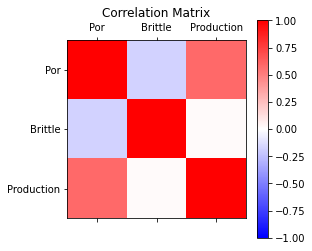

In [8]:
plot_corr(df,4)                                           # using our correlation matrix visualization function
plt.show()

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  For more complete information, let's look at the matrix scatter plot from the Pandas package. 

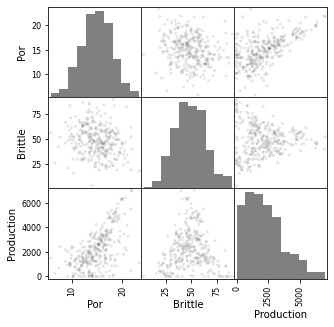

In [9]:
pd_plot.scatter_matrix(df, alpha = 0.1,                   # pandas matrix scatter plot
    figsize=(5, 5),color = 'black', hist_kwds={'color':['grey']})
plt.show()

#### Check the Training and Testing Split

* histograms and then summary statistics for train and test data subsets
* ensure good testing coverage and avoid model extrapolation

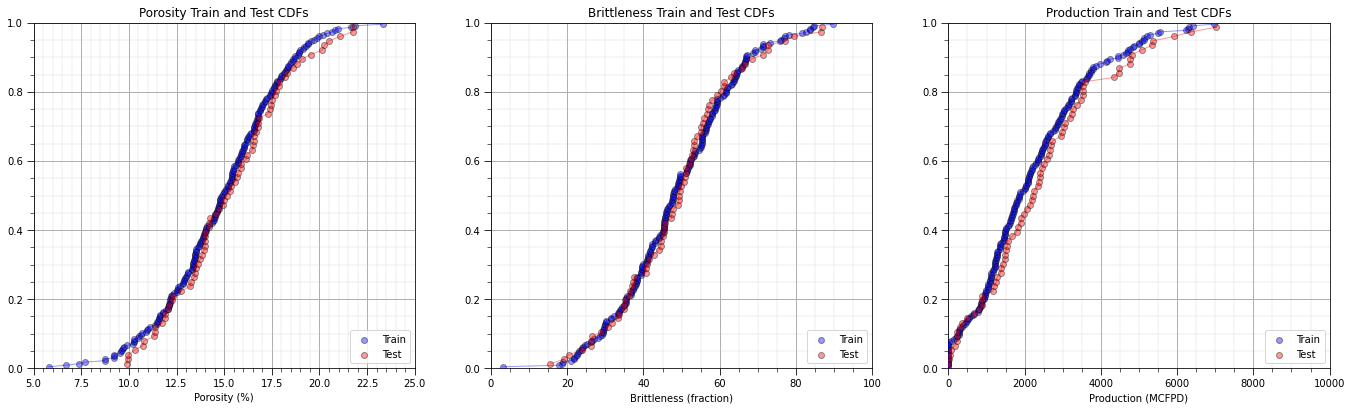

In [10]:
nbin = 20

plt.subplot(131)
plot_CDF(X_train[Xname[0]],'blue',alpha=0.4,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[0]],'red',alpha=0.4,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[0]); plt.xlim(Xmin[0],Xmax[0]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[0] + ' Train and Test CDFs')

plt.subplot(132)
plot_CDF(X_train[Xname[1]],'blue',alpha=0.4,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[1]],'red',alpha=0.4,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[1]); plt.xlim(Xmin[1],Xmax[1]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[1] + ' Train and Test CDFs')

plt.subplot(133)
plot_CDF(y_train[yname],'blue',alpha=0.4,lw=1,ls='solid',label='Train')
plot_CDF(y_test[yname],'red',alpha=0.4,lw=1,ls='solid',label='Test')
plt.xlabel(ylabelunit); plt.xlim(ymin,ymax); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(ylabel + ' Train and Test CDFs')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [11]:
display(X_train.describe().transpose())          # calculate summary statistics for the data
display(X_test.describe().transpose())           # calculate summary statistics for the data

display(y_train.describe().transpose())          # calculate summary statistics for the data
display(y_test.describe().transpose())           # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,225.0,14.840311,3.062031,5.79,12.87,14.88,16.89,23.31
Brittle,225.0,48.575244,15.206793,3.03,38.21,47.74,58.81,89.85


,count,mean,std,min,25%,50%,75%,max
Por,75.0,15.217867,2.949515,9.88,13.345,15.13,17.34,21.74
Brittle,75.0,48.778267,15.130556,15.61,37.335,49.24,56.88,86.80


,count,mean,std,min,25%,50%,75%,max
Production,225.0,2150.371894,1510.603067,0.0,1085.78181,1864.714733,3029.41436,6966.01178


,count,mean,std,min,25%,50%,75%,max
Production,75.0,2375.079088,1626.09176,0.0,1267.428891,2213.612488,3249.338762,7033.138845


The distributions are well behaved, we cannot observe obvious gaps nor truncations. Let's look at a scatter plot of predictor features with points colored by the response feature.

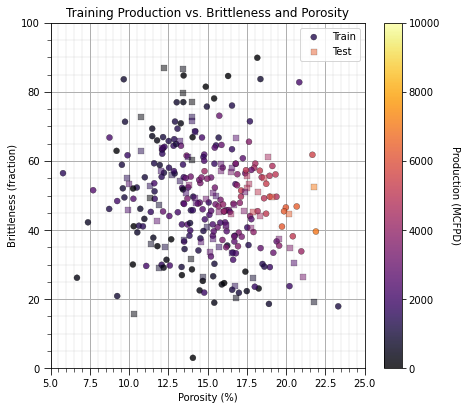

In [12]:
plt.subplot(121)                                          # visualize the data
im = plt.scatter(X_train[Xname[0]],X_train[Xname[1]],s=None, c=y_train[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.scatter(X_test[Xname[0]],X_test[Xname[1]],s=None, c=y_test[yname], marker='s', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.5, linewidths=0.3, edgecolors="black", label = 'Test')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

This problem looks complicated and could not be modeled with simple linear regression. It appears that there are non-linearities. Let's use a simple nonparametric model, decision tree.

#### Training and Tuning a Decision Tree (Regression Tree)

Now we are ready to run the DecisionTreeRegressor command to build our regression tree to predict our response feature  given our 2 predictor features (recall we limit ourselves here to 2 predictor features for ease of visualization).  

* We will use our two functions defined above to visualize the decision tree prediction over the feature space and the cross plot of actual and estimated production for the training data along with three model metrics from the sklearn.metric module.

***Hyper Parameters** - we constrain our tree complexity with:

* *max_leaf_nodes* - maximum number of regions
* *max_depth* - maximum number of levels, e.g., max_depth = 1 is a stump tree with only 1 decision and two regions
* *min_samples_leaf* - minimum number of data in a new region, good constraint to ensure each region has enough data to make a reasonable estimate

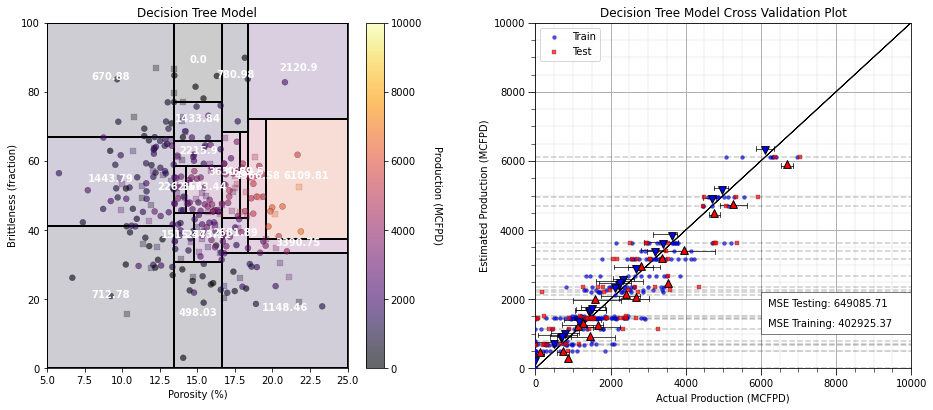

In [13]:
max_leaf_nodes = 20
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)
#tree_model = tree.DecisionTreeRegressor(max_depth = 3, min_samples_leaf=5)
tree_model = tree_model.fit(X_train.values, y_train.values)

plt.subplot(121)                                    # visualize, data, and decision tree regions and predictions
visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) # plots the data points and the decision tree prediction 
    
plt.subplot(122)                                    # cross validation with conditional statistics plot
check_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
    
# plt.subplot(133)                                    # hyperparameter tuning plot with current result plotted
# tree_tuning(100,max_leaf_nodes,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
#                     y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Error vs. Complexity - Hyperparameter Tuning',seed)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.2); plt.show()

See the horizontal lines on the plot of estimated vs. actual production (plot on the bottom)? 

* That is expected as the regression tree estimates with the average of the data in each region of the feature space (terminal node). 

* To further assess the model performance, I have included the actual response P10, mean and P90 for each leaf node, region for both training and testing.

If we have a more complicated tree with more terminal nodes then there would be more lines.  

The visualization of the estimates over the entire feature space demonstrate the hierarchical binary splitting applied in a decision tree (the plot on the top).

* It is useful and instructive to visualize the tree.  There is a nice tree visualization function in the sklearn.tree known as plot_tree. Check out the result below.  

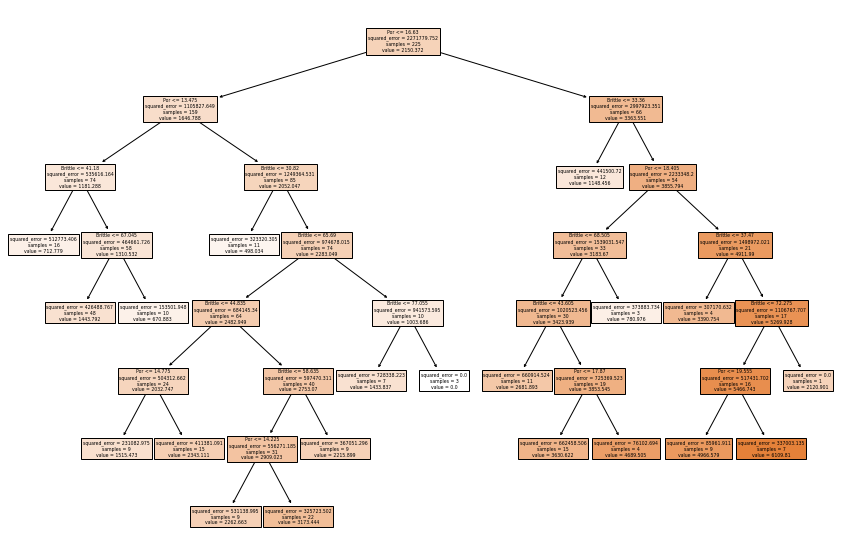

In [14]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_model, 
                   feature_names=list(Xname),  
                   class_names=list(yname),
                   filled=True)

#### Hyperparameter Tuning

Now let's vary the decision tree complexity and find the complexity that minimizes MSE in testing

* the code below loops over maximum leaf nodes, regions

* we set miniumum number of samples to 1 to ensure we get the desired number of leaf nodes

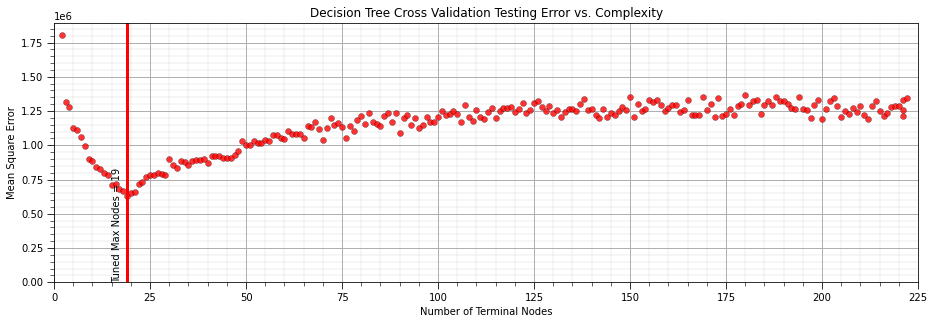

In [15]:
trees = []; error = []; var_exp = [] ; nodes = []

inodes = 2
while inodes < len(X_train):
    tree_model = tree.DecisionTreeRegressor(min_samples_leaf=1,max_leaf_nodes=inodes).fit(X_train.values, y_train.values); trees.append(tree_model)
    #visualize_tree(my_tree,X_train["Por"],X_train["Brittle"],y_train["Prod"],'Training Data and Decision Tree Model, Nodes = ' + str(inodes) )

    predict_train = tree_model.predict(np.c_[X_test[Xname[0]],X_test[Xname[1]]]) 
    error.append(metrics.mean_squared_error(y_test[yname],predict_train)); var_exp.append(metrics.explained_variance_score(y_test[yname],predict_train))    

    all_nodes = tree_model.tree_.node_count             
    decision_nodes = len([x for x in tree_model.tree_.feature if x != _tree.TREE_UNDEFINED]); terminal_nodes = all_nodes - decision_nodes
    nodes.append(terminal_nodes); inodes+=1
    
plt.figure(figsize=(8,6))
plt.scatter(nodes,error,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
tuned_nodes = nodes[np.argmin(error)]; max_error = np.max(error)
plt.arrow(tuned_nodes,0,0,1.05*max_error,width=0.5,color='red',head_length=0.0,head_width=0.0)
plt.annotate('Tuned Max Nodes = ' + str(tuned_nodes),(tuned_nodes-4,1.0e4),rotation=90)
plt.title('Decision Tree Cross Validation Testing Error vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_error); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2); plt.show()

It is useful to evaluate the performance of our tree by observing the accuracy vs. complexity trade-off.  Also, it was useful for us to observed the tree model over the feature space as we incrementally add terminal nodes. We can graphically observe the hierarical binary splitting quite clearly.  

For a more robust result, let's try k-fold cross validation. sklearn has a built in cross validation method called cross_val_score that we can use to:

1. Apply k-fold approach with iterative separation of training and testing data
2. With k=5, we have 20% withheld for testing for each fold
3. Automate the model construction, looping over folds and averaging the metric of interest

Let's try it out on our trees with variable number of terminal nodes.  Note the cross validation is set to use 4 processors, but still will likely take a couple of minutes to run.

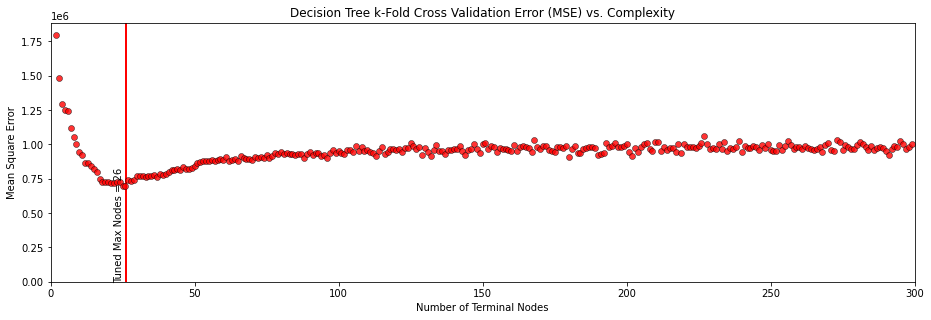

In [16]:
score = []; node = []                                     # k-fold iteration code modified from StackOverFlow by Dimosthenis

node_max = len(X)
for inodes in range(2,node_max):
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=inodes) 
    scores = cross_val_score(estimator=tree_model, X= np.c_[df[Xname[0]],df[Xname[1]]],y=df[yname], cv=5, n_jobs=4,
        scoring = "neg_mean_squared_error")               # perform 4-fold cross validation
    score.append(abs(scores.mean())); node.append(inodes)
    
tuned_node = node[np.argmin(score)]; max_error = np.max(score)   
plt.figure(figsize=(8,6))
plt.arrow(tuned_node,0,0,1.05*max_error,width=0.5,color='red',head_length=0.0,head_width=0.0)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node),(tuned_node-4,1.0e4),rotation=90)
plt.scatter(node,score,s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, edgecolors="black")
plt.title('Decision Tree k-Fold Cross Validation Error (MSE) vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,node_max); plt.ylim(0,1.05*max_error)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2)
plt.show()

It is clear that at about 26 terminal nodes minimizes the test mean square error for the provided dataset. Of course results will vary if you change the dataset or the features.

* all our train and test cross validation or k-fold cross validation was to get this one value, the model **hyperparameter**  

#### Build the Final Model

Now let's take that hyperparameter and train on all the data, this is our **final model**

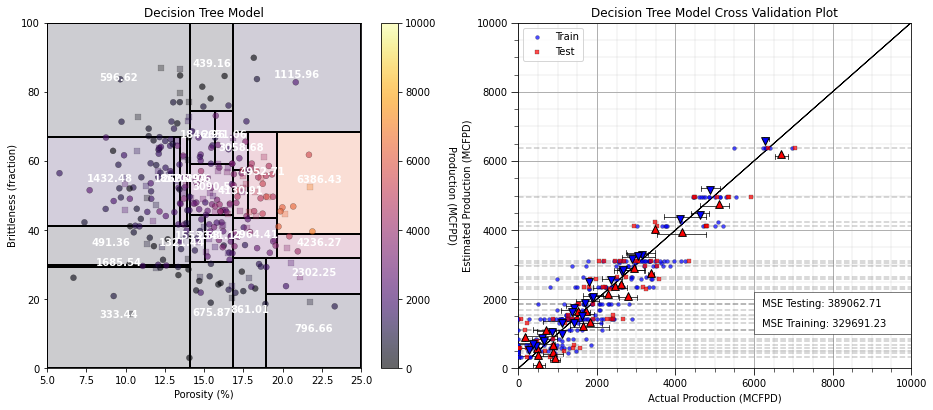

In [17]:
pruned_tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_node)
pruned_tree_model = pruned_tree_model.fit(X, y)

plt.subplot(121)                                          # visualize, data, and decision tree regions and predictions
visualize_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) # plots the data points and the decision tree prediction 
    
plt.subplot(122)                                          # cross validation with conditional statistics plot
check_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
       
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Let's cover a couple more decision tree diagnostics. 

#### Interogating Decision Trees

It may be useful to evaluate for any possible feature combination, the order of decision nodes that resulted in the specific prediction.  The following function provides the list of nodes and decision 1 is $\le$ and 0 is $\gt$. We start at node 0 and traverse the series of splits to reach the prediction.

In [18]:
x1 = 10.0; x2 = 30.0                                      # the predictor feature values for the decision path
decision_path = pruned_tree_model.decision_path(np.c_[x1,x2])
print(decision_path)

  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 17)	1
  (0, 19)	1
  (0, 46)	1
  (0, 48)	1
  (0, 49)	1


#### Extracting the Model as a Function

Furthermore it may be useful to convert the decision tree to code, a nested set of 'if' statements.  

* This creates a portable model that could be copied and applied as a standalone function.  

Also, one could conveniently interogate the code version of the tree.  

* We use the previously defined function to do this with our pruned tree.

In [19]:
tree_to_code(pruned_tree_model, list(Xname))              # convert a decision tree to Python code, nested if statements

def tree(Por, Brittle):
  if Por <= 16.84500026702881:
    if Por <= 14.130000114440918:
      if Brittle <= 66.81499862670898:
        if Brittle <= 41.18000030517578:
          if Brittle <= 29.22000026702881:
            return [[333.43972676]]
          elif Brittle > 29.22000026702881
            if Brittle <= 29.99000072479248:
              return [[1685.54155117]]
            elif Brittle > 29.99000072479248
              if Por <= 13.09000015258789:
                return [[491.36359424]]
              elif Por > 13.09000015258789
                return [[1321.43816169]]
        elif Brittle > 41.18000030517578
          if Por <= 13.050000190734863:
            return [[1432.48266985]]
          elif Por > 13.050000190734863
            if Por <= 13.925000190734863:
              if Por <= 13.489999771118164:
                return [[1867.49014615]]
              elif Por > 13.489999771118164
                return [[2586.93598778]]
            elif Por > 13.925000190734863
 

Let's check the Gini importance measure.  This is normalized, total reduction mean squared error due to inclusion of the variable.

In [20]:
print('Por Importance =', round(pruned_tree_model.feature_importances_[0],2),'Brittle Importance =', round(pruned_tree_model.feature_importances_[1],2))

Por Importance = 0.53 Brittle Importance = 0.47


#### Visualize the Model

Let's take a last look at the graphical representation of our pruned tree.  

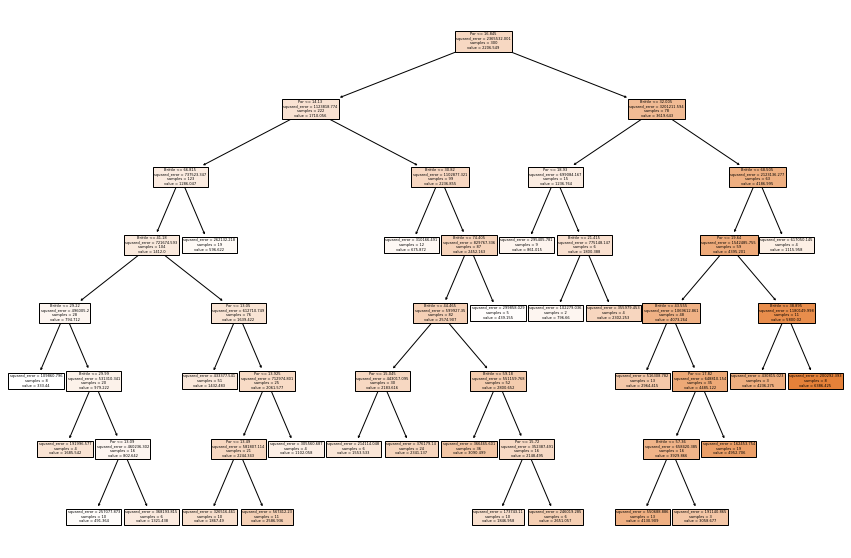

In [21]:
fig = plt.figure(figsize=(15,10))

_ = tree.plot_tree(pruned_tree_model,                     # plot the decision tree for model visualization 
                   feature_names=list(Xname),  
                   class_names=list(yname),
                   filled=True)

#### Simple Code to Make a Decision Tree Machine and Calculate a Prediction

To support those just getting started, here's a minimal amount of code to:

* load the scikit-learn package for decision trees
* load data
* instantiate a decision tree with hyperparameters (no tuning is shown)
* train the decision tree with the training data
* make a prediction with the decision tree

In [22]:
from sklearn import tree                                  # import decision tree from scikit-learn
Xname = ['Por','Brittle']; yname='Production'             # predictor features and response feature
x1 = 0.25; x2 = 0.3                                       # predictor values for the prediction
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load subsurface data table
my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=26) # instantiate tree with hyperparameters
my_tree = my_tree.fit(X.values,y.values) # train tree with training data
estimate = my_tree.predict([[x1,x2]])[0]                  # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results

Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 333.4 MCFPD


#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsilation of a seuqence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [23]:
pipe_tree = Pipeline([                                        # the machine learning workflow as a pipeline object
    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'tree__max_leaf_nodes': np.arange(2,len(X),1,dtype = int),
}

KF_tuned_tree = GridSearchCV(pipe_tree, params, scoring = 'neg_mean_squared_error', # hyperparameter tuning with grid search k-fold cross validation 
                             cv=KFold(n_splits=5,shuffle=False),refit = True)
KF_tuned_tree.fit(X,y)                                        # fit model with tuned hyperparameters to all the data

print('Tuned hyperparameter: max_leaf_nodes = ' + str(KF_tuned_tree.best_params_))

estimate = KF_tuned_tree.predict([[x1,x2]])[0]                  # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results


Tuned hyperparameter: max_leaf_nodes = {'tree__max_leaf_nodes': 26}
Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 333.4 MCFPD



There are so many more exercised and tests that one could attempt to gain experience with decison trees. I'll end here for brevity, but I invite you to continue. Consider, on your own apply other data sets or attempting modeling with random forest and boosting.  I hope you found this tutorial useful. I'm always happy to discuss geostatistics, statistical modeling, uncertainty modeling and machine learning,

#### Comments

This was a basic demonstration of decision trees for machine learning. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  